## load libraries

In [1]:
import os
# import keyring
import urllib3
import requests
import json
# import folium

import ipywidgets as widgets

from IPython.display import display

from arcgis.gis import GIS
# from arcgis.auth import EsriSession
# from arcgis.geocoding import geocode
# from arcgis.mapping import WebMap
# from arcgis.features import FeatureLayer
# from arcgis.mapping import MapImageLayer
from arcgis.raster import ImageryLayer
from arcgis.geometry import Point

# from arcgis.widgets import MapView
# import arcgis.raster.functions 

# import rasterio
# from rasterio.plot import show

In [2]:
# I keep getting security warnings, but cannot get the gis object to recognize the certificates
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [3]:
# UMich ArcGIS Online URL
org_url = "https://umich.maps.arcgis.com/"

username = 'jqwhite_umich'

In [4]:
# client_id = os.getenv('ARCGIS_CLIENT_ID')
# client_secret = os.getenv('ARCGIS_CLIENT_SECRET')

# if not client_id or not client_secret:
#     raise ValueError("Please set the ARCGIS_CLIENT_ID and ARCGIS_CLIENT_SECRET environment variables")

In [5]:
client_id = 'ntJbWmRxBwawEZjk'
client_secret = '60100ab454f140878cd4495e68a91f8d'

In [6]:
# # OAuth credentials

profile = 'umich_arcgis_siads699'

# Path to your certificate bundle
# can't get cert_path to be recognized
cert_path = '/Users/jwhite/umich_cert.pem'  # Update this path to your certificate bundle

# Create a GIS object using OAuth credentials
gis = GIS(org_url, client_id=client_id, client_secret=client_secret)

## success if data NOT from Living Atlas

In [7]:
# Define the base URL of your image service
landscape_local_url = 'https://landscape12.arcgis.com/arcgis/rest/services/LOCA_USA_CONUS_Climate_Thresholds/ImageServer'

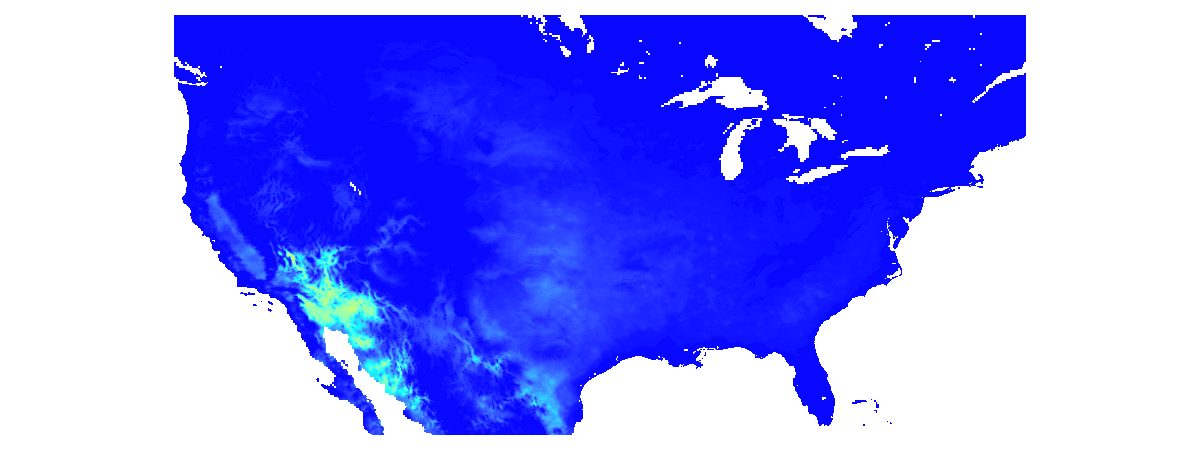

In [8]:
landscape_local_layer = ImageryLayer(landscape_local_url)
landscape_local_layer

In [9]:
dimensions = landscape_local_layer.multidimensional_info

In [10]:
dimension_names = [dimension['name'] for dimension in dimensions['multidimensionalInfo']['variables']]
dimension_names

['Annual highest precipitation for a single day, Hig',
 'Annual highest precipitation for a single day, His',
 'Annual highest precipitation for a single day, Low',
 'Annual highest precipitation over a five-day perio',
 'Annual number of days with a maximum temperature g',
 'Annual precipitation days greater than 1 inch, Hig',
 'Annual precipitation days greater than 1 inch, His',
 'Annual precipitation days greater than 1 inch, Low',
 'Annual precipitation days greater than 2 inches, H',
 'Annual precipitation days greater than 2 inches, L',
 'Annual precipitation days greater than 3 inches, H',
 'Annual precipitation days greater than 3 inches, L',
 'Annual precipitation days greater than 4 inches, H',
 'Annual precipitation days greater than 4 inches, L',
 'Annual precipitation, High emissions scenario (RCP',
 'Annual precipitation, Historical, 1976-2005',
 'Annual precipitation, Low emissions scenario (RCP ',
 'Annual single highest maximum temperature, High em',
 'Annual single h

In [11]:
# landscape_local_layer.get_samples?

In [12]:
# Define Point geometry
geometry = Point({
    'x': -106.328,
    'y': 34.708,
    'spatialReference': {'wkid': 4326}
}) # somewhere in New Mexico

# Get samples from the image service layer
samples = landscape_local_layer.get_samples(
    geometry=geometry,
    geometry_type='esriGeometryPoint',
    return_first_value_only=False
)

In [13]:
sample_values = [f"{float(samples[i]['value']):>9.3f}" for i, _ in enumerate(samples)]
sample_values

['    0.130',
 '   70.730',
 '   12.430',
 '   54.130',
 '   31.810',
 '    0.000',
 '  830.120',
 '   34.450',
 ' 3958.610',
 '   11.780',
 '    2.770',
 '    1.710',
 '    3.400',
 '   57.990',
 '   99.730',
 '    2.890',
 '    0.000',
 '   28.090',
 '    0.350',
 ' 4798.030']

In [14]:
list(zip(sample_values, dimension_names, ))

[('    0.130', 'Annual highest precipitation for a single day, Hig'),
 ('   70.730', 'Annual highest precipitation for a single day, His'),
 ('   12.430', 'Annual highest precipitation for a single day, Low'),
 ('   54.130', 'Annual highest precipitation over a five-day perio'),
 ('   31.810', 'Annual number of days with a maximum temperature g'),
 ('    0.000', 'Annual precipitation days greater than 1 inch, Hig'),
 ('  830.120', 'Annual precipitation days greater than 1 inch, His'),
 ('   34.450', 'Annual precipitation days greater than 1 inch, Low'),
 (' 3958.610', 'Annual precipitation days greater than 2 inches, H'),
 ('   11.780', 'Annual precipitation days greater than 2 inches, L'),
 ('    2.770', 'Annual precipitation days greater than 3 inches, H'),
 ('    1.710', 'Annual precipitation days greater than 3 inches, L'),
 ('    3.400', 'Annual precipitation days greater than 4 inches, H'),
 ('   57.990', 'Annual precipitation days greater than 4 inches, L'),
 ('   99.730', 'Annu

## failure with Living Atlas data

<Item title:"U.S. Climate Thresholds - LOCA Historical" type:Tiled Imagery Layer owner:maps_nationalclimate>
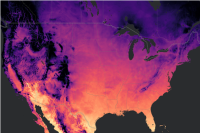

In [15]:
us_loca_historical = gis.content.get('d05d0d54334d4b2b84aae67ba2cc00c0')
us_loca_historical

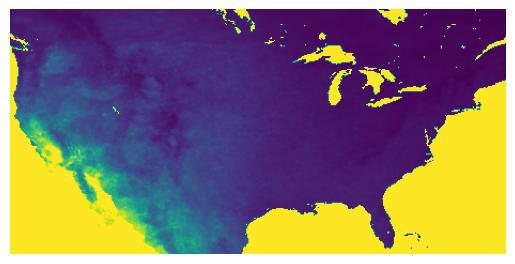

In [16]:
us_loca_hist_layer = ImageryLayer(us_loca_historical.url)
us_loca_hist_layer

In [17]:
dimensions_us_loca_hist = landscape_local_layer.multidimensional_info

In [18]:
dimensions_us_loca_hist_names = [dimension['name'] for dimension in dimensions_us_loca_hist['multidimensionalInfo']['variables']]
dimensions_us_loca_hist_names

['Annual highest precipitation for a single day, Hig',
 'Annual highest precipitation for a single day, His',
 'Annual highest precipitation for a single day, Low',
 'Annual highest precipitation over a five-day perio',
 'Annual number of days with a maximum temperature g',
 'Annual precipitation days greater than 1 inch, Hig',
 'Annual precipitation days greater than 1 inch, His',
 'Annual precipitation days greater than 1 inch, Low',
 'Annual precipitation days greater than 2 inches, H',
 'Annual precipitation days greater than 2 inches, L',
 'Annual precipitation days greater than 3 inches, H',
 'Annual precipitation days greater than 3 inches, L',
 'Annual precipitation days greater than 4 inches, H',
 'Annual precipitation days greater than 4 inches, L',
 'Annual precipitation, High emissions scenario (RCP',
 'Annual precipitation, Historical, 1976-2005',
 'Annual precipitation, Low emissions scenario (RCP ',
 'Annual single highest maximum temperature, High em',
 'Annual single h

In [19]:
# Define Point geometry
geometry = Point({
    'x': -106.328,
    'y': 34.708,
    'spatialReference': {'wkid': 4326}
}) # somewhere in New Mexico

# Get samples from the image service layer
samples = us_loca_hist_layer.get_samples(
    geometry=geometry,
    geometry_type='esriGeometryPoint',
    return_first_value_only=False
)

RuntimeError: Failed to perform get samples operation on the TilesOnly service